In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binned_statistic
import math

In [2]:
cvfolds = 54
pred_y = np.load("bestlstm.npy")
#pred_y = np.load("myrawlstm_cv54_stateless.npy")
seqlen = pred_y.shape[1]
#seqlen = 100
pred_y = pred_y.reshape((-1, 2))
print pred_y.shape, seqlen, np.min(pred_y), np.max(pred_y)

(5400, 2) 100 0.518570125103 105.781448364


In [3]:
y = np.loadtxt("1_16_London_RNN_data_2x400_at19_bin100-RAW_pos.dat")
#y = np.load("London_RNN_data_2x1000_at50_bin100-RAW_pos.npy")
y = y[:pred_y.shape[0]]
print y.shape, np.min(y), np.max(y)

(5400, 2) 4.464 107.171


In [4]:
def mse(y, t, axis=2):
    return (np.square(y - t).mean(axis=axis).mean())

def mean_distance(y, t, axis=2):
    return np.mean(np.sqrt(np.sum((y - t)**2, axis=axis)))

In [5]:
print mse(pred_y[:1100], y[:1100], axis=1), mean_distance(pred_y[:1100], y[:1100], axis=1)
print mse(pred_y[4400:], y[4400:], axis=1), mean_distance(pred_y[4400:], y[4400:], axis=1)

39.747113516 7.61885036049
28.9799819341 6.44026129708


In [6]:
errors = np.sqrt(np.sum((pred_y - y)**2, axis=1))
print np.mean(errors), errors.shape

6.69661131668 (5400,)


In [7]:
meanerrors = np.mean(np.reshape(errors, (cvfolds, -1)), axis=1)
print meanerrors, meanerrors.shape

[ 10.28161026   9.28581783   7.4793622   10.40198691   6.6730442
   6.05099552   7.00501037   7.06995935   4.72113684   9.05381043
   5.78462005   6.56833479   7.34594614  10.50056287   6.76779499
   5.36748467   6.6576013    6.48217663   5.76937146   7.53082832
   5.39400049   6.0491055    4.81557812   7.37578555   9.17026226
   5.84534557   7.55467569   7.22117888   7.00123798   6.09954286
   5.60378607   5.19265932   6.2601458    6.44706792   7.90152138
   4.79464301   4.57221561   5.73210314   7.02295718   6.71981927
   5.3928302    5.50646084   6.22238557   6.52163477   4.98875258
   5.67199092   8.86193973   5.15843278   4.8954943    6.2136577
   5.78088428   7.51174216   7.48670193   7.8330166 ] (54,)


In [8]:
plotmeanerrors = np.repeat(meanerrors, errors.shape[0] / cvfolds)
print plotmeanerrors.shape, plotmeanerrors[:20]

(5400,) [ 10.28161026  10.28161026  10.28161026  10.28161026  10.28161026
  10.28161026  10.28161026  10.28161026  10.28161026  10.28161026
  10.28161026  10.28161026  10.28161026  10.28161026  10.28161026
  10.28161026  10.28161026  10.28161026  10.28161026  10.28161026]


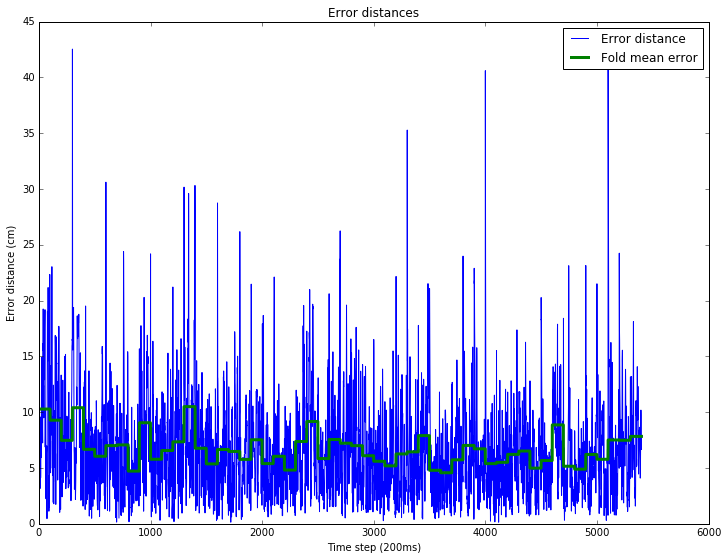

In [9]:
plt.figure(figsize=(12,9))
plt.plot(errors)
plt.plot(plotmeanerrors, linewidth=3);
plt.legend(("Error distance", "Fold mean error"))
plt.title("Error distances")
plt.ylabel("Error distance (cm)")
plt.xlabel("Time step (200ms)")

(54, 100)
(100,)


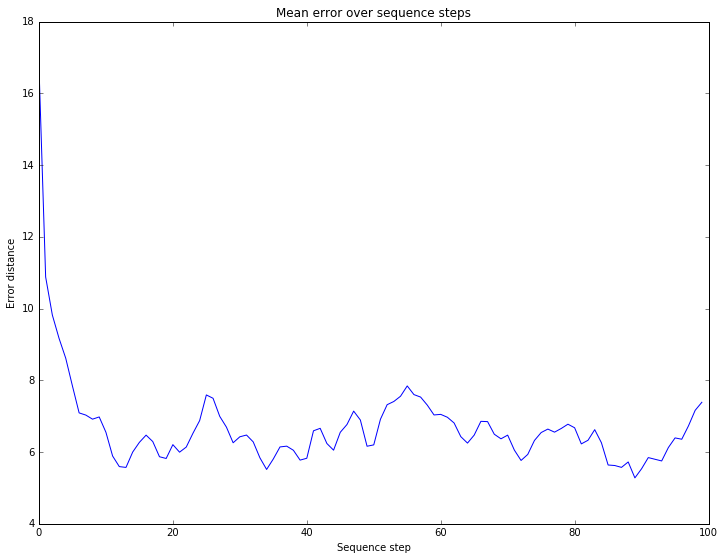

In [10]:
seqerrors = np.reshape(errors, (-1,100))
print seqerrors.shape
meanerrors = np.mean(seqerrors, axis=0)
print meanerrors.shape
plt.figure(figsize=(12,9))
plt.plot(meanerrors);
plt.title("Mean error over sequence steps")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")

In [11]:
pred_y2 = np.load("bestbilstm.npy").reshape((-1, 2))
print pred_y2.shape
#y2 = np.load("London_RNN_data_2x1000_at50_bin100-RAW_pos.npy")
y2 = np.loadtxt("1_16_London_RNN_data_2x400_at19_bin100-RAW_pos.dat")
y2 = y2[:pred_y2.shape[0]]
errors2 = np.sqrt(np.sum((pred_y2 - y2)**2, axis=1))
print np.mean(errors2), errors2.shape

(5400, 2)
6.89514757058 (5400,)


(54, 100)
(100,)


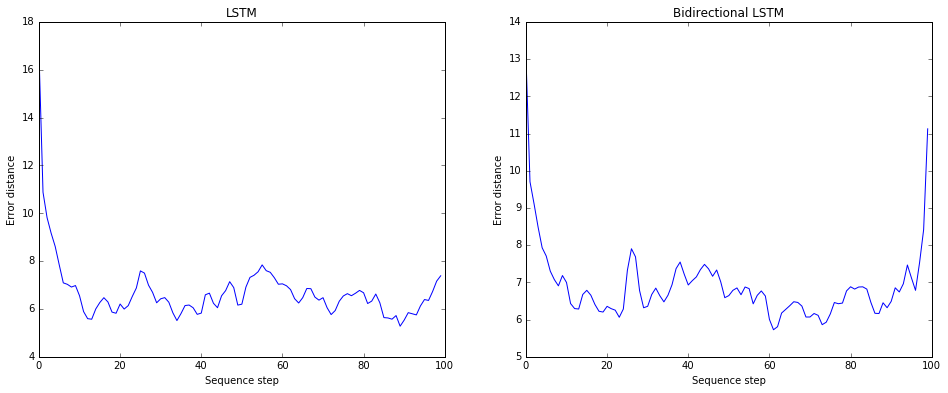

In [12]:
seqerrors2 = np.reshape(errors2, (-1,100))
print seqerrors2.shape
meanerrors2 = np.mean(seqerrors2, axis=0)
print meanerrors2.shape
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(meanerrors);
plt.title("LSTM")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")
plt.subplot(1,2,2)
plt.plot(meanerrors2);
plt.title("Bidirectional LSTM")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")
#plt.ylim([8, 26])

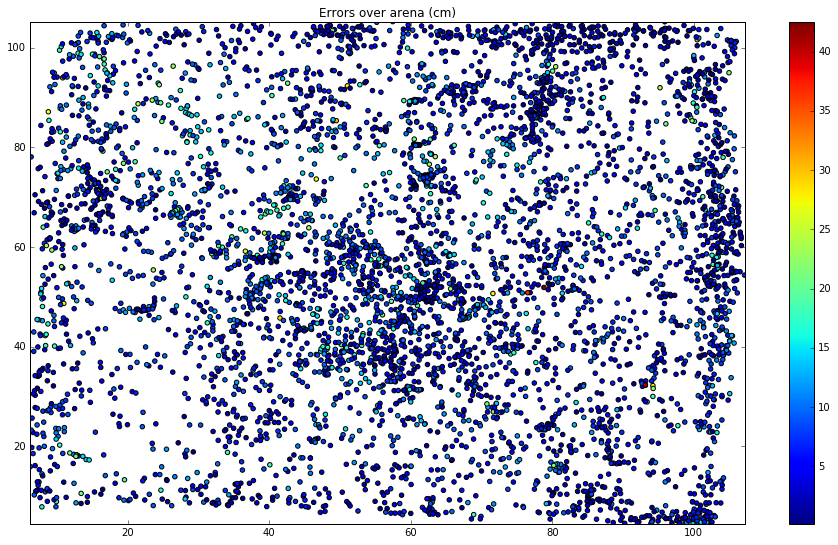

In [13]:
plt.figure(figsize=(16,9))
plt.scatter(y[:,0], y[:,1],c=errors)
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])
plt.colorbar();
plt.title("Errors over arena (cm)")

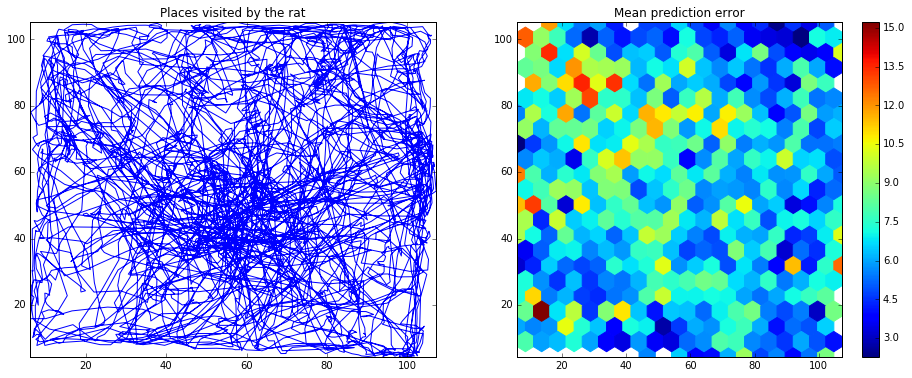

In [14]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(y[:,0], y[:,1]);
plt.title("Places visited by the rat")
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])
plt.subplot(1,2,2)
plt.title("Mean prediction error")
plt.hexbin(y[:,0], y[:,1],C=errors, gridsize=20)
plt.colorbar();

In [15]:
seqy = np.reshape(y, (-1, 100, 2))
print seqy.shape
diff = seqy[:,1:,:] - seqy[:,:-1,:]
print diff.shape
diff  = np.reshape(diff, (-1, 2))
print diff.shape

differrors = np.reshape(seqerrors[:,1:], (-1))
print differrors.shape

(54, 100, 2)
(54, 99, 2)
(5346, 2)
(5346,)


In [16]:
dists = np.sqrt(np.sum(diff**2, axis=1))
print dists.shape, np.mean(dists)

(5346,) 3.75711041817


101 100


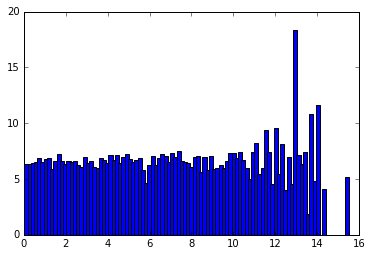

In [17]:
nb_bins = 100
statistic, bin_edges, binnumber = binned_statistic(dists, differrors, statistic='mean', bins=nb_bins)
print len(bin_edges), len(statistic)
plt.bar(bin_edges[:-1], statistic,width=0.2);

In [18]:
angles = np.arctan2(diff[:,1], diff[:,0])
print angles.shape

(5346,)


In [19]:
nb_bins = 100
statistic, bin_edges, binnumber = binned_statistic(angles, differrors, statistic='mean', bins=nb_bins)
print len(bin_edges), len(statistic)

101 100


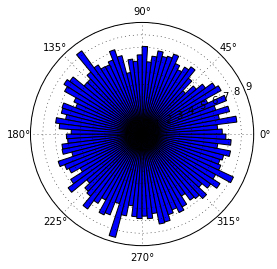

In [20]:
plt.gca(projection='polar')
plt.bar(bin_edges[:-1], statistic, width=2*math.pi/nb_bins);